#Task 3





In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries Imported')

Libraries Imported


In [ ]:
# importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import DecisionTreeRegressor
print('Libraries imported')

Libraries imported


In [ ]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X=df.iloc[:,1:-1]
Y=df.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)


In [ ]:
print("train data shape {},train label shape {}".format(X_train.shape,Y_train.shape))
print("test data shape {},test label shape {}".format(X_test.shape,Y_test.shape))

train data shape (135, 3),train label shape (135,)
test data shape (15, 3),test label shape (15,)


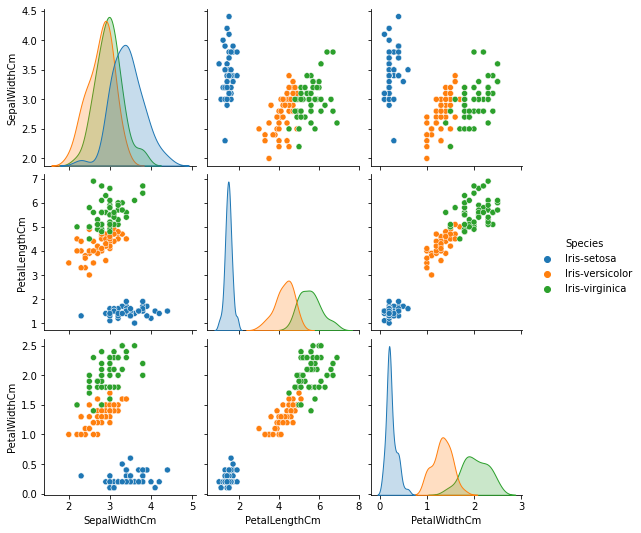

In [ ]:
df=df.iloc[:,1:]
sns.pairplot(df,hue='Species')

In [ ]:
lm=DecisionTreeClassifier(random_state=0)
lm.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

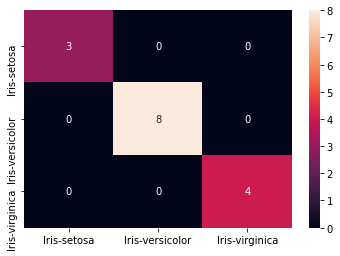

In [ ]:
Y_test_pred=lm.predict(X_test)
confusion_matrix_df=pd.DataFrame(data=confusion_matrix(Y_test,Y_test_pred),index=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                                 columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])
sns.heatmap(confusion_matrix_df,annot=True)

In [ ]:
Y_train_pred=lm.predict(X_train)
Y_test_pred=lm.predict(X_test)
print('Train accuracy score :', accuracy_score(Y_train,Y_train_pred))
print('Test accuracy score :', accuracy_score(Y_test,Y_test_pred))

Train accuracy score : 1.0
Test accuracy score : 1.0


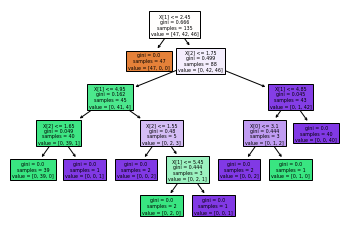

In [35]:
plt.rcParams['figure.figsize']==(15,15)
plot_tree(lm, filled=True)
print()

In [38]:
decision_tree=tree.export_graphviz(df,out_file='tree.dot',feature_names=X.columns,filled=True)

TypeError: ignored